# Life Expectancy EDA (Exploratory Data Analyses)

## Contents
### 1. Introduction
### 2. General View of the Data
### 3. Data Cleaning
### 4. Exploring the Data
### 5. Feature Engineering
### 6. Results
### 7. Conclusions and Further Research

### 1. Introduction

In this project, we will analyse some health and economical metrics in order to understand which type of conditions affect life expectancy most. The project relies on WHO (World Health Organization) data repository including 193 countries that also can be defined as **Developed** and **Developing** Countries.

### 2. General View of the Data

**Country:** Country

**Year:** Year

**Status:** Developed or Developing status

**Life expectancy:** Life Expectancy in age

**Adult Mortality:** Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

**infant deaths:** Number of Infant Deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**percentage expenditure:** Expenditure on health as a percentage of Gross Domestic Product per capita(%)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

**Measles:**  Measles - number of reported cases per 1000 population

**BMI:**  Average Body Mass Index of entire population

**under-five deaths:** Number of under-five deaths per 1000 population

**Polio:** Polio (Pol3) immunization coverage among 1-year-olds (%)

**Total expenditure:** General government expenditure on health as a percentage of total government expenditure (%)

**Diphtheria:**  Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

**HIV/AIDS:** Deaths per 1 000 live births HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**thinness 1-19 years:** Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

**thinness 5-9 years:** Prevalence of thinness among children for Age 5 to 9(%)

**Income composition of resources:** Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling(years)

*Kaggle Page: https://www.kaggle.com/kumarajarshi/life-expectancy-who*

### Importing Libraries

In [568]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale

warnings.filterwarnings('ignore')

### Reading Data

In [569]:
df = pd.read_csv('Lifeex.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

We have 22 columns and 2938 total rows. 

**Country** and **Status** are our categorical variables. 

Let's rename our columns name, it will be easier to work with:

In [571]:
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

### 3. Data Cleaning

#### We should check if we have any NaN values in our data:

In [572]:
df.isnull().sum()*100/df.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

**GDP, HepatitisB and Population** has lots of NaN values. As we don't want to lose them, we will use some methods to handle NAN values. Before doing so, let's see NAN values heatmap:

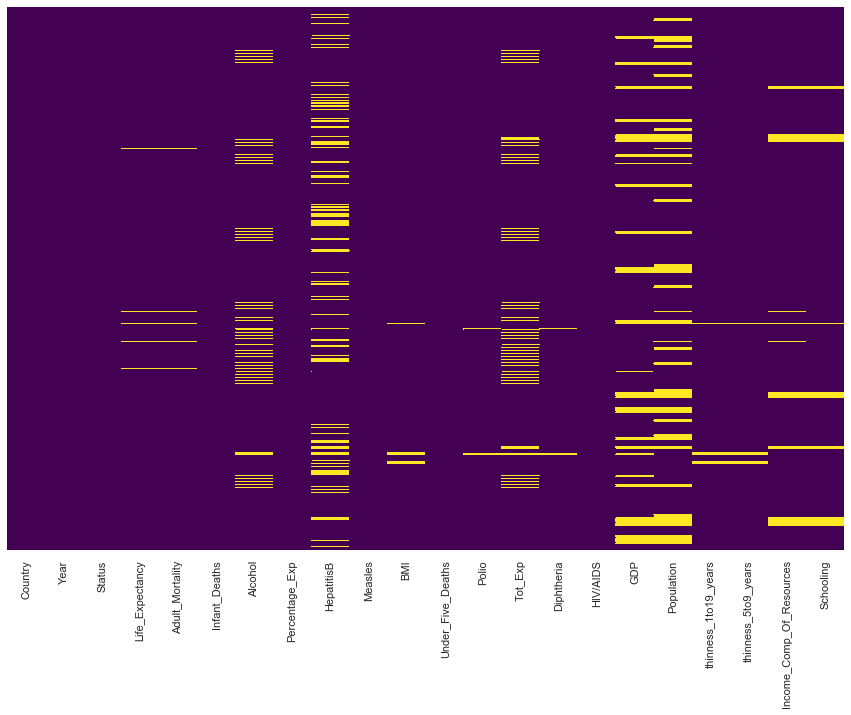

In [573]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

### Firstly, since we have year trends, we can interpolate NaN valuse by grouping them by country. In this way, if a country have 2000 and 2002 data but 2001 is NaN, we can fill it with trend.

In [574]:
country_list = df.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

In [575]:
for country in country_list:
    df.loc[df['Country'] == country,fill_list] = df.loc[df['Country'] == country,fill_list].interpolate()

Let's check our NaN values again:

In [576]:
df.isnull().sum()*100/df.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.569095
Percentage_Exp               0.000000
HepatitisB                   4.901293
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.000000
Tot_Exp                      7.181756
Diphtheria                   0.000000
HIV/AIDS                     0.000000
GDP                         14.363513
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

### HepatitisB was 18.82%, now it is 4.90%. But GDP and Population hasn't changed too much
Checking which countries have NaN value for GDP:

In [577]:
dx = df.loc[df['GDP'].isnull()]
dx['Country'].unique()

array(['Bahamas', 'Bolivia (Plurinational State of)', "Côte d'Ivoire",
       'Congo', 'Cook Islands', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Egypt', 'Eritrea', 'Gambia',
       'Iran (Islamic Republic of)', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Libya',
       'Micronesia (Federated States of)', 'Monaco', 'Niue',
       'Papua New Guinea', 'Republic of Korea', 'Republic of Moldova',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino', 'Slovakia',
       'Syrian Arab Republic',
       'The former Yugoslav republic of Macedonia',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen'],
      dtype=object)

#### There are lots of countries have at least one NaN value in GDP column. In fact, we can find those numbers on internet and add manually but we will skip this for now and fill some variables with median. Let's fill Life Expectancy NaN values according to country median:

In [578]:
df['Life_Expectancy'].fillna(df.groupby(['Country'])['Life_Expectancy'].transform('median'), inplace = True)

Checking what is left:

In [579]:
dy = df.loc[df['Life_Expectancy'].isnull()]
dy

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


Just 10 rows of some countries LE data from 2013, we can drop these rows:

In [580]:
df.dropna(axis=0, subset=['Life_Expectancy'], inplace = True)

And lastly, we will fill total expenditure with the country median, schooling and human development index with the status median. 

In [581]:
df['Tot_Exp'].fillna(df.groupby(['Country'])['Tot_Exp'].transform('median'), inplace = True)
df['Tot_Exp'].fillna(df.groupby(['Status'])['Schooling'].transform('median'), inplace = True)
df['Tot_Exp'].fillna(df.groupby(['Status'])['Income_Comp_Of_Resources'].transform('median'), inplace = True)


Let's drop BMI column, we will not use it:

In [582]:
df.drop(columns=['BMI']).head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


##### We don't want to fill our data any more because it can manipulate our results, we will loose lots of rows but let's copy our file and use dropna:

In [583]:
df2 = df.copy()

In [584]:
df2.dropna(inplace=True)

In [585]:
df2.isnull().sum()*100/df2.isnull().count()

Country                     0.0
Year                        0.0
Status                      0.0
Life_Expectancy             0.0
Adult_Mortality             0.0
Infant_Deaths               0.0
Alcohol                     0.0
Percentage_Exp              0.0
HepatitisB                  0.0
Measles                     0.0
BMI                         0.0
Under_Five_Deaths           0.0
Polio                       0.0
Tot_Exp                     0.0
Diphtheria                  0.0
HIV/AIDS                    0.0
GDP                         0.0
Population                  0.0
thinness_1to19_years        0.0
thinness_5to9_years         0.0
Income_Comp_Of_Resources    0.0
Schooling                   0.0
dtype: float64

### Lastly, checking outliers:

will use winsorize to get rid of them

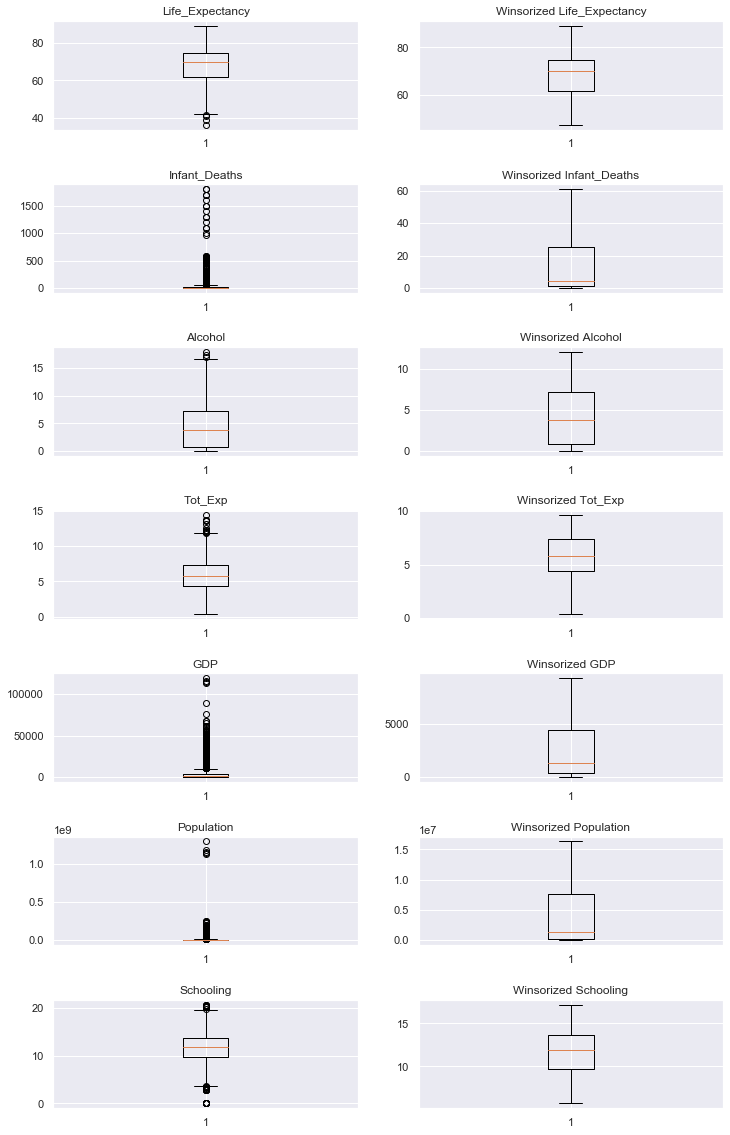

In [586]:
plt.figure(figsize = (12,20))
plt.subplots_adjust(hspace = 0.5)
plt.subplot(7,2,1)
plt.boxplot(df2['Life_Expectancy'])
plt.title('Life_Expectancy')
plt.subplot(7,2,2)
plt.boxplot(winsorize(df2['Life_Expectancy'],(0.03, 0)))
plt.title('Winsorized Life_Expectancy')
plt.subplot(7,2,3)
plt.boxplot(df2['Infant_Deaths'])
plt.title('Infant_Deaths')
plt.subplot(7,2,4)
plt.boxplot(winsorize(df2['Infant_Deaths'],(0, 0.10)))
plt.title('Winsorized Infant_Deaths')
plt.subplot(7,2,5)
plt.boxplot(df2['Alcohol'])
plt.title('Alcohol')
plt.subplot(7,2,6)
plt.boxplot(winsorize(df2['Alcohol'],(0, 0.05)))
plt.title('Winsorized Alcohol')
plt.subplot(7,2,7)
plt.boxplot(df2['Tot_Exp'])
plt.title('Tot_Exp')
plt.subplot(7,2,8)
plt.boxplot(winsorize(df2['Tot_Exp'],(0, 0.05)))
plt.title('Winsorized Tot_Exp')
plt.subplot(7,2,9)
plt.boxplot(df2['GDP'])
plt.title('GDP')
plt.subplot(7,2,10)
plt.boxplot(winsorize(df2['GDP'], (0, 0.13)))
plt.title('Winsorized GDP')
plt.subplot(7,2,11)
plt.boxplot(df2['Population'])
plt.title('Population')
plt.subplot(7,2,12)
plt.boxplot(winsorize(df2['Population'],(0, 0.15)))
plt.title('Winsorized Population')
plt.subplot(7,2,13)
plt.boxplot(df2['Schooling'])
plt.title('Schooling')
plt.subplot(7,2,14)
plt.boxplot(winsorize(df2['Schooling'], (0.05, 0.02)))
plt.title('Winsorized Schooling')

plt.show()


In [547]:
df2_wins = df2
df2_wins["Life_Expectancy"]=winsorize(df2["Life_Expectancy"], (0.03, 0))
df2_wins["Infant_Deaths"]=winsorize(df2["Infant_Deaths"], (0, 0.10))
df2_wins["Alcohol"]=winsorize(df2["Alcohol"], (0, 0.05))
df2_wins["Tot_Exp"]=winsorize(df2["Tot_Exp"], (0, 0.05))
df2_wins["GDP"]=winsorize(df2["GDP"], (0, 0.13))
df2_wins["Population"]=winsorize(df2["Population"], (0, 0.15))
df2_wins["Schooling"]=winsorize(df2["Schooling"], (0.05, 0.02))

### 4. Exploring the Data

Just a quick look for countries:

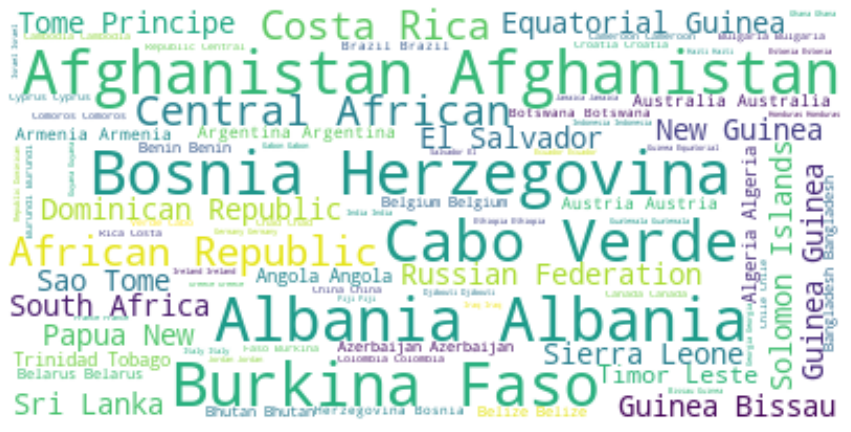

In [548]:
from wordcloud import WordCloud

Country = df2['Country']

wordcloud = WordCloud(background_color="white").generate(" ".join(Country))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [550]:
df2_wins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2937
Data columns (total 22 columns):
Country                     1987 non-null object
Year                        1987 non-null int64
Status                      1987 non-null object
Life_Expectancy             1987 non-null float64
Adult_Mortality             1987 non-null float64
Infant_Deaths               1987 non-null int64
Alcohol                     1987 non-null float64
Percentage_Exp              1987 non-null float64
HepatitisB                  1987 non-null float64
Measles                     1987 non-null int64
BMI                         1987 non-null float64
Under_Five_Deaths           1987 non-null int64
Polio                       1987 non-null float64
Tot_Exp                     1987 non-null float64
Diphtheria                  1987 non-null float64
HIV/AIDS                    1987 non-null float64
GDP                         1987 non-null float64
Population                  1987 non-null float64
thi

### Distribution of Variables

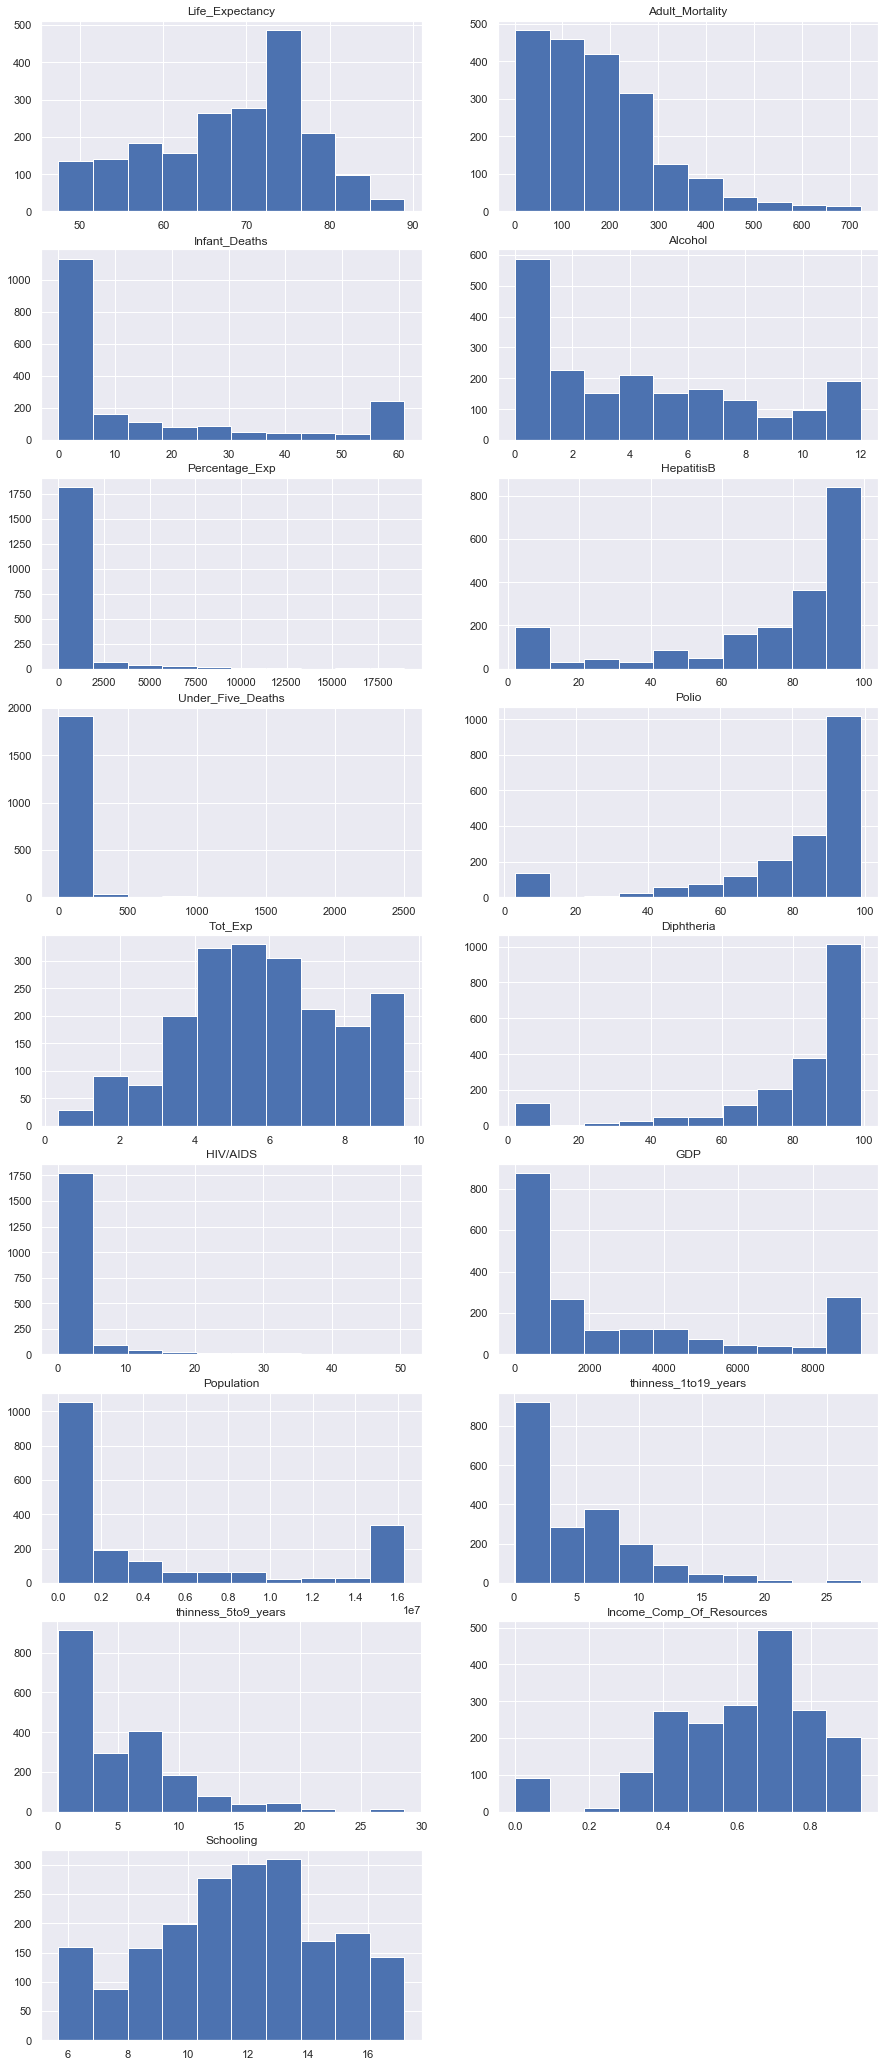

In [395]:
all_col = ['Life_Expectancy','Adult_Mortality','Infant_Deaths',
         'Alcohol','Percentage_Exp','HepatitisB',
        'Under_Five_Deaths','Polio','Tot_Exp',
         'Diphtheria','HIV/AIDS','GDP',
         'Population','thinness_1to19_years','thinness_5to9_years',
        'Income_Comp_Of_Resources',
         'Schooling',]

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(df2_wins[all_col[i]])
    plt.title(all_col[i])

plt.show()

#### As you can see, life expectancy, total expenditure, human development index and schooling looks like having normal distributions

Now we will analyse distributions in two categories: **Develeoped** ones and **Developing** ones, let's see if there is any meaningful differences:

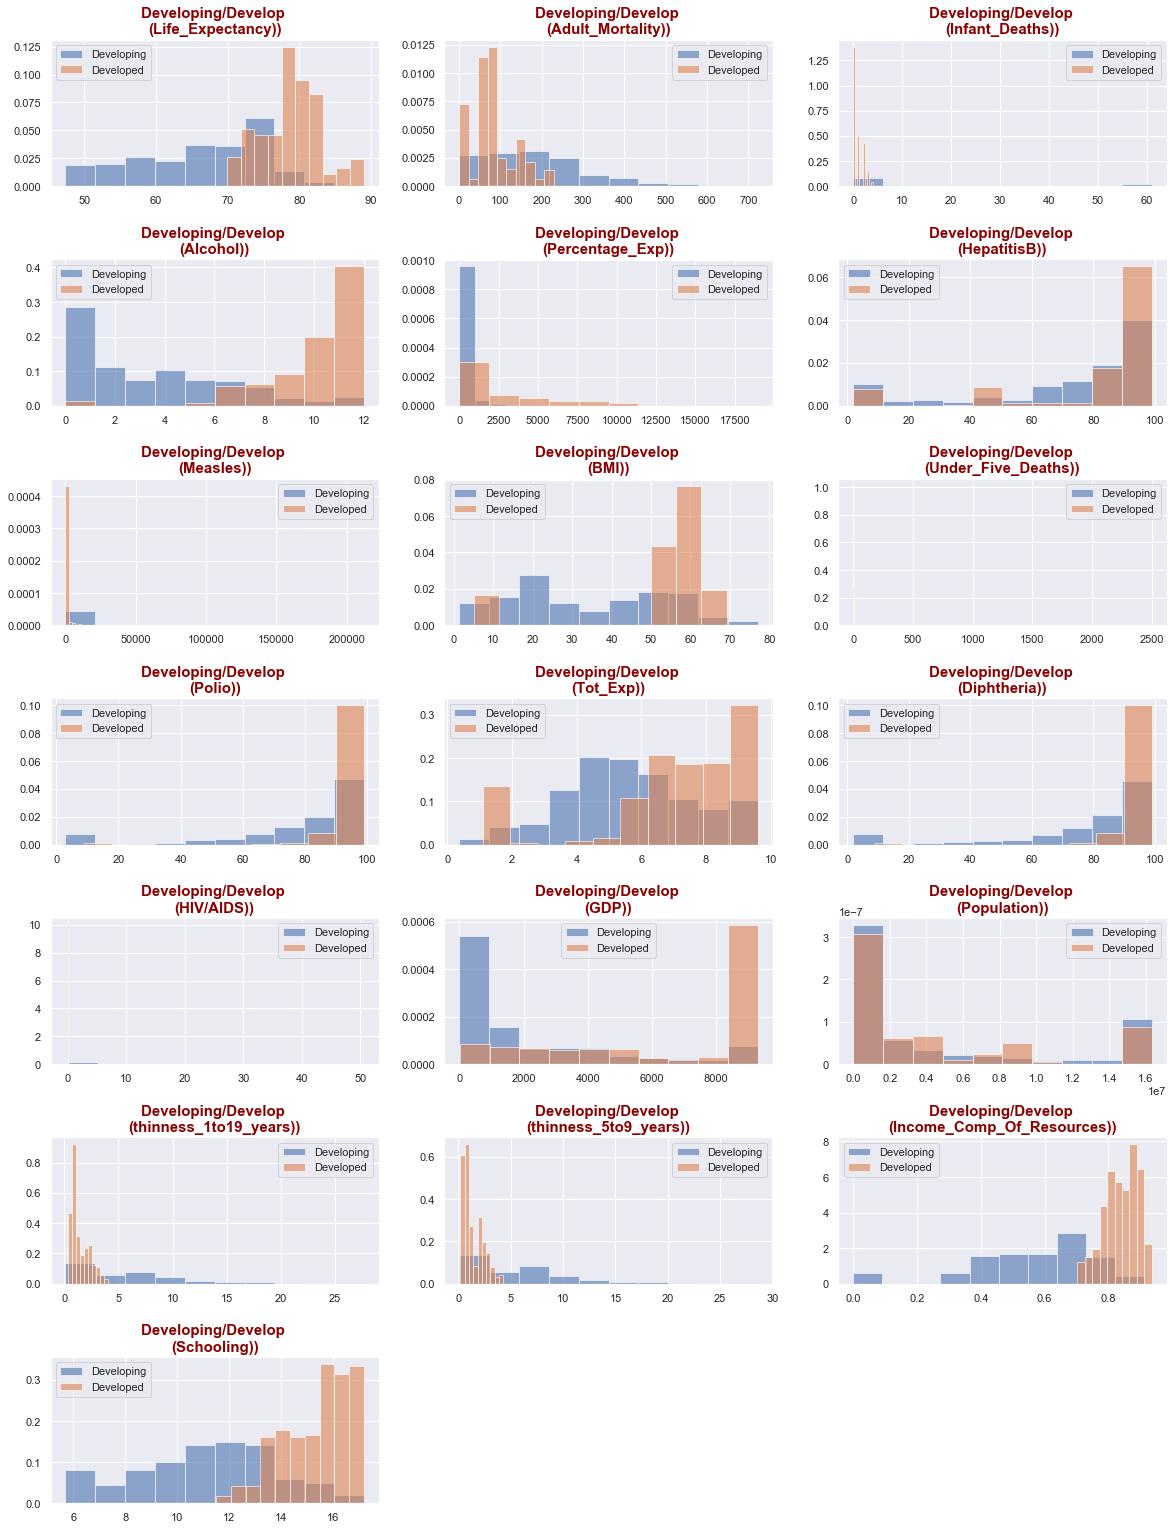

In [320]:
plt.figure(figsize=(20,35))
plt.subplots_adjust(hspace=0.5)
font_baslik={"family":"arial", "color":"darkred", "weight":"bold", "size":15}



for i in range(3, len(df2_wins.columns)):
    plt.subplot(9,3,i+1)
    plt.hist(df2_wins[df2_wins["Status"]=='Developing'].iloc[:,i], density=True, alpha=0.6)
    plt.hist(df2_wins[df2_wins["Status"]=='Developed'].iloc[:,i], density=True, alpha=0.6)
    plt.legend(["Developing", "Developed"])
    plt.ylabel
    plt.title("Developing/Develop \n({}))".format(df2_wins.columns[i]), 
              fontdict=font_baslik)
    
plt.show()

##### As expected, some variable distrubutions are different in developed countries such as schooling, total expenditure, GDP, life expectancy and alcohol. 

Let's see how these variables change in years for both developing and developed ones:

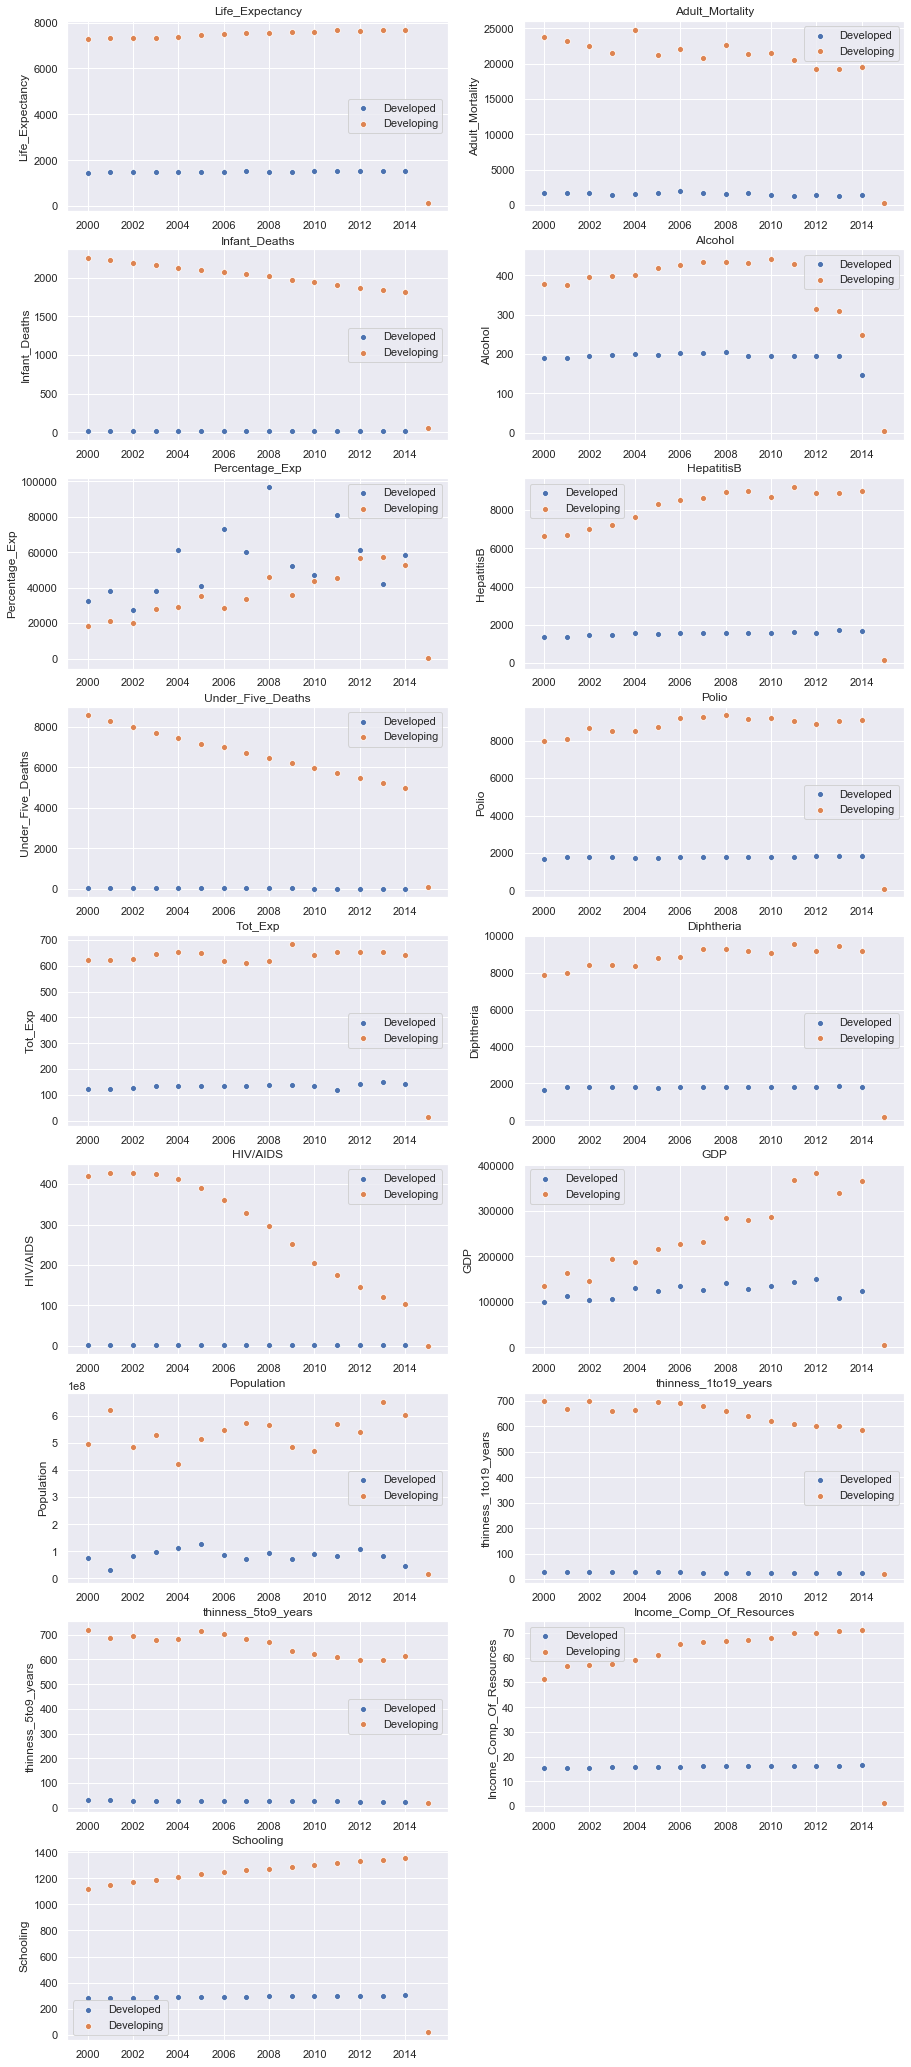

In [592]:
sns.set(color_codes=True)
all_col2 = ['Life_Expectancy','Adult_Mortality','Infant_Deaths',
         'Alcohol','Percentage_Exp','HepatitisB',
        'Under_Five_Deaths','Polio','Tot_Exp',
         'Diphtheria','HIV/AIDS','GDP',
         'Population','thinness_1to19_years','thinness_5to9_years',
        'Income_Comp_Of_Resources',
         'Schooling',]


plt.figure(figsize=(15,75))

for i in range(len(all_col2)):
    plt.subplot(18,2,i+1)
    sns.scatterplot(df2_wins[df2_wins['Status'] == 'Developed']['Year'].unique()[::-1] , 
             df2_wins[df2_wins['Status'] == 'Developed'][all_col[i]].groupby(df2_wins['Year']).sum())

    sns.scatterplot(df2_wins[df2_wins['Status'] == 'Developing']['Year'].unique()[::-1] , 
             df2_wins[df2_wins['Status'] == 'Developing'][all_col[i]].groupby(df2_wins['Year']).sum())

    plt.title(all_col[i])
    plt.legend(["Developed", "Developing"])

plt.show()



### In total, changes of some variables in years:

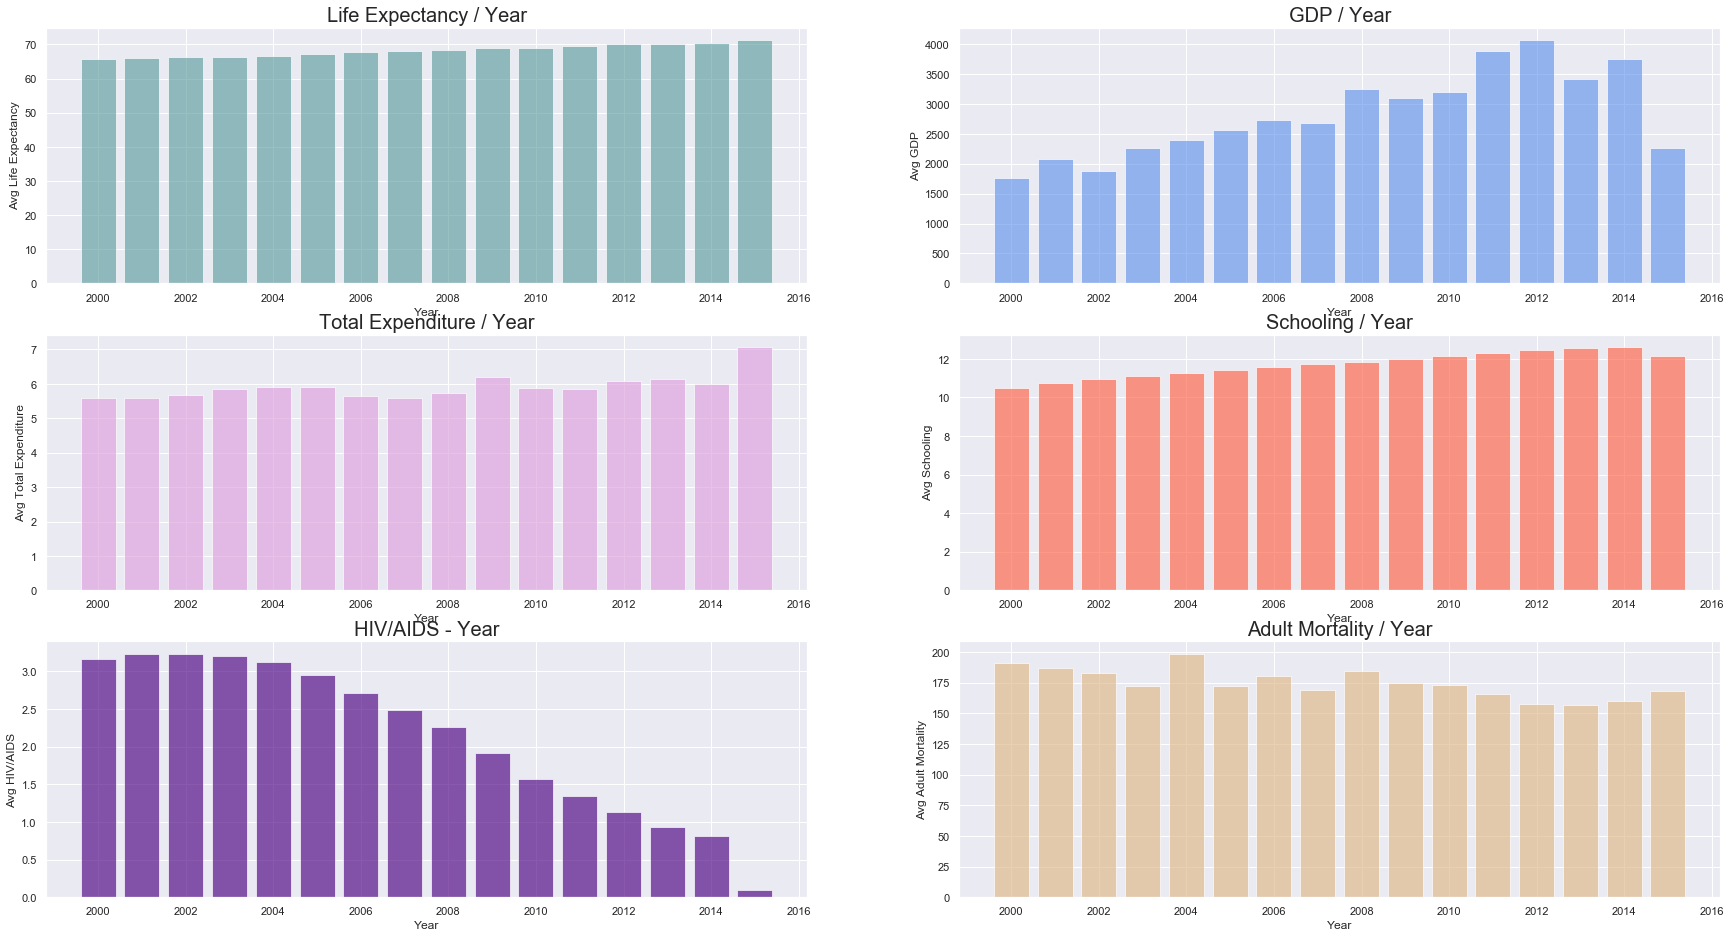

In [459]:
plt.figure(figsize=(30,16))

plt.subplot(3,2,1)
plt.bar(df2_wins.groupby('Year')['Year'].count().index,df2_wins.groupby('Year')['Life_Expectancy'].mean(),color='cadetblue',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life Expectancy",fontsize=12)
plt.title("Life Expectancy / Year", fontsize=20)

plt.subplot(3,2,2)
plt.bar(df2_wins.groupby('Year')['Year'].count().index,df2_wins.groupby('Year')['GDP'].mean(),color='cornflowerblue',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg GDP",fontsize=12)
plt.title("GDP / Year", fontsize=20)

plt.subplot(3,2,3)
plt.bar(df2_wins.groupby('Year')['Year'].count().index,df2_wins.groupby('Year')['Tot_Exp'].mean(),color='plum',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Total Expenditure",fontsize=12)
plt.title("Total Expenditure / Year", fontsize=20)

plt.subplot(3,2,4)
plt.bar(df2_wins.groupby('Year')['Year'].count().index,df2_wins.groupby('Year')['Schooling'].mean(),color='tomato',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Schooling",fontsize=12)
plt.title("Schooling / Year", fontsize=20)

plt.subplot(3,2,5)
plt.bar(df2_wins.groupby('Year')['Year'].count().index,df2_wins.groupby('Year')['HIV/AIDS'].mean(),color='indigo',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg HIV/AIDS",fontsize=12)
plt.title("HIV/AIDS - Year", fontsize=20)

plt.subplot(3,2,6)
plt.bar(df2_wins.groupby('Year')['Year'].count().index,df2_wins.groupby('Year')['Adult_Mortality'].mean(),color='burlywood',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Adult Mortality",fontsize=12)
plt.title("Adult Mortality / Year", fontsize=20)
plt.show()

It is nice to see HIV/AIDS trend is decreasing by years, we can say that people are getting more concious with this illness day by day.

## 5. Feature Engineering

### Looking for relations between variables in both total and developed countries

You will find scatter plots for variables, our target is analysing **Life Expectancy** comparing with others to find out relations between them. On left side, there will be total data graphs, on right side only developed countries:

In [475]:
ddf = df2_wins[df2_wins['Status'] == 'Developed']

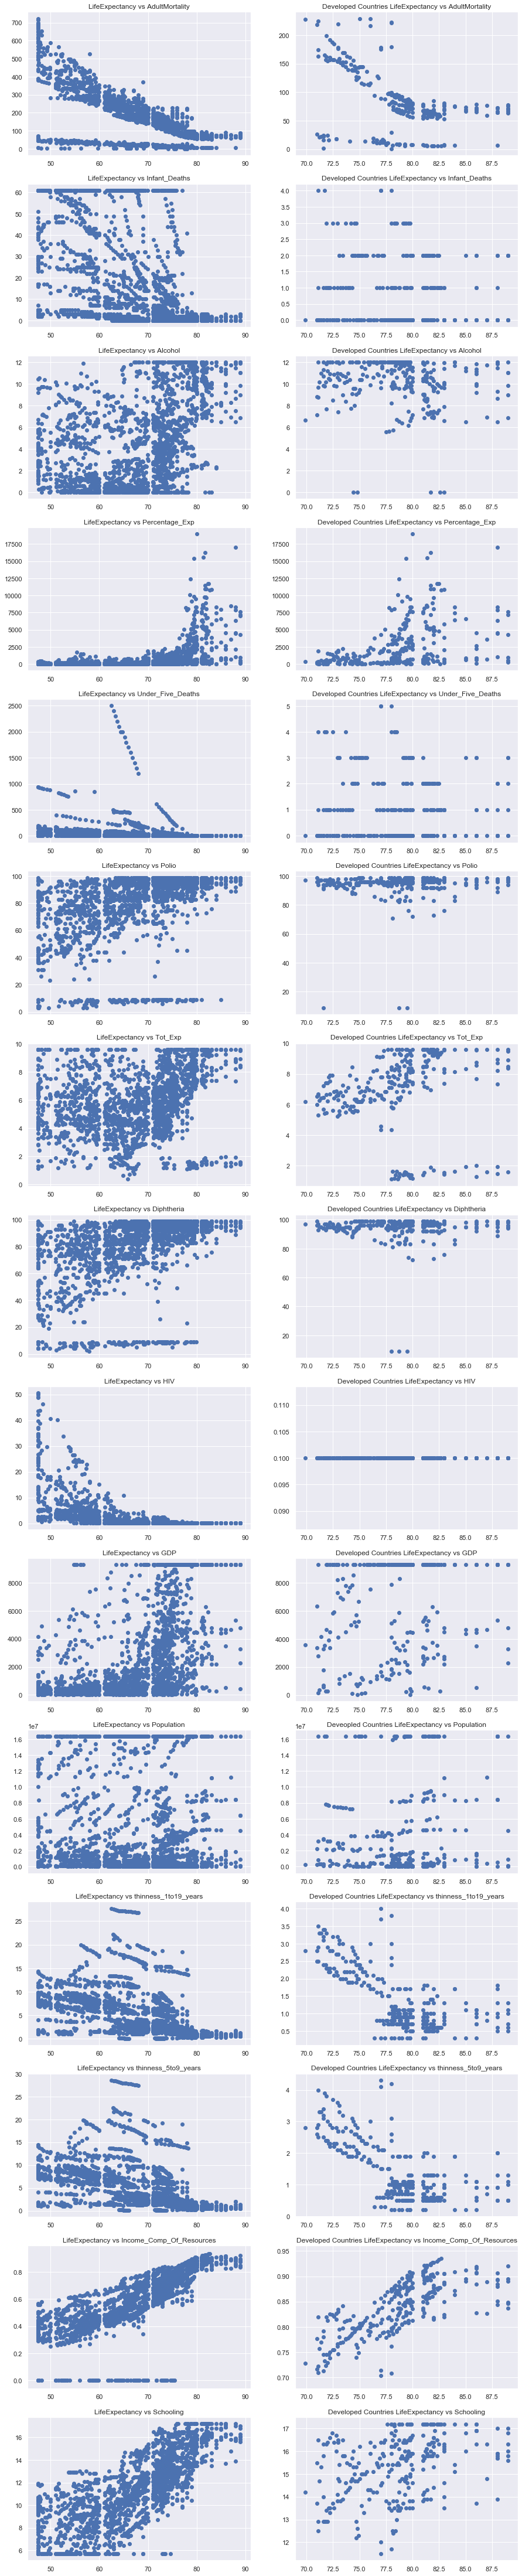

In [476]:
plt.figure(figsize=(15,80))

plt.subplot(15,2,1)
plt.scatter(df2_wins["Life_Expectancy"], df2_wins["Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(15,2,2)
plt.scatter(ddf["Life_Expectancy"], ddf["Adult_Mortality"])
plt.title("Developed Countries LifeExpectancy vs AdultMortality")

plt.subplot(15,2,3)
plt.scatter(df2_wins["Life_Expectancy"], df2_wins["Infant_Deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(15,2,4)
plt.scatter(ddf["Life_Expectancy"], ddf["Infant_Deaths"])
plt.title("Developed Countries LifeExpectancy vs Infant_Deaths")

plt.subplot(15,2,5)
plt.scatter(df2_wins["Life_Expectancy"], df2_wins["Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(15,2,6)
plt.scatter(ddf["Life_Expectancy"], ddf["Alcohol"])
plt.title("Developed Countries LifeExpectancy vs Alcohol")

plt.subplot(15,2,7)
plt.scatter(df2_wins["Life_Expectancy"], df2_wins["Percentage_Exp"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(15,2,8)
plt.scatter(ddf["Life_Expectancy"], ddf["Percentage_Exp"])
plt.title("Developed Countries LifeExpectancy vs Percentage_Exp")

plt.subplot(15,2,9)
plt.scatter(df2_wins["Life_Expectancy"], df2_wins["Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(15,2,10)
plt.scatter(ddf["Life_Expectancy"], ddf["Under_Five_Deaths"])
plt.title("Developed Countries LifeExpectancy vs Under_Five_Deaths")

plt.subplot(15,2,11)
plt.scatter(df2_wins["Life_Expectancy"], df2_wins["Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(15,2,12)
plt.scatter(ddf["Life_Expectancy"], ddf["Polio"])
plt.title("Developed Countries LifeExpectancy vs Polio")

plt.subplot(15,2,13)
plt.scatter(df2_wins["Life_Expectancy"], df2_wins["Tot_Exp"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(15,2,14)
plt.scatter(ddf["Life_Expectancy"], ddf["Tot_Exp"])
plt.title("Developed Countries LifeExpectancy vs Tot_Exp")

plt.subplot(15,2,15)
plt.scatter(df2_wins["Life_Expectancy"], df2_wins["Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(15,2,16)
plt.scatter(ddf["Life_Expectancy"], ddf["Diphtheria"])
plt.title("Developed Countries LifeExpectancy vs Diphtheria")

plt.subplot(15,2,17)
plt.scatter(df2_wins["Life_Expectancy"], df2_wins["HIV/AIDS"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(15,2,18)
plt.scatter(ddf["Life_Expectancy"], ddf["HIV/AIDS"])
plt.title("Developed Countries LifeExpectancy vs HIV")

plt.subplot(15,2,19)
plt.scatter(df2_wins["Life_Expectancy"], df2_wins["GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(15,2,20)
plt.scatter(ddf["Life_Expectancy"], ddf["GDP"])
plt.title("Developed Countries LifeExpectancy vs GDP")

plt.subplot(15,2,21)
plt.scatter(df2_wins["Life_Expectancy"], df2_wins["Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(15,2,22)
plt.scatter(ddf["Life_Expectancy"], ddf["Population"])
plt.title("Deveopled Countries LifeExpectancy vs Population")

plt.subplot(15,2,23)
plt.scatter(df2_wins["Life_Expectancy"], df2_wins["thinness_1to19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(15,2,24)
plt.scatter(ddf["Life_Expectancy"], ddf["thinness_1to19_years"])
plt.title("Developed Countries LifeExpectancy vs thinness_1to19_years")

plt.subplot(15,2,25)
plt.scatter(df2_wins["Life_Expectancy"], df2_wins["thinness_5to9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(15,2,26)
plt.scatter(ddf["Life_Expectancy"], ddf["thinness_5to9_years"])
plt.title("Developed Countries LifeExpectancy vs thinness_5to9_years")

plt.subplot(15,2,27)
plt.scatter(df2_wins["Life_Expectancy"], df2_wins["Income_Comp_Of_Resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(15,2,28)
plt.scatter(ddf["Life_Expectancy"], ddf["Income_Comp_Of_Resources"])
plt.title("Developed Countries LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(15,2,29)
plt.scatter(df2_wins["Life_Expectancy"], df2_wins["Schooling"])
plt.title("LifeExpectancy vs Schooling")

plt.subplot(15,2,30)
plt.scatter(ddf["Life_Expectancy"], ddf["Schooling"])
plt.title("Developed Countries LifeExpectancy vs Schooling")


plt.show()

### There is nothing different for developed countries but we can easily say that developing country data is bigger than developed ones.

After analysing graphs, life expectancy and adult mortality have somehow negative relation.
On the other hand, schooling and human development index have positive correlations with LE.

## Is there anyone wonders Turkey?


In [517]:
df2_wins[df2_wins['Country'] == 'Turkey']

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
2682,Turkey,2014,Developing,75.5,17.0,16,1.45,181.908378,96.0,565,...,96.0,5.41,96.0,0.1,9291.227619,773628.0,4.9,4.7,0.759,14.5
2683,Turkey,2013,Developing,75.2,19.0,17,1.41,188.144035,97.0,7405,...,98.0,5.38,98.0,0.1,9291.227619,16321581.0,4.9,4.7,0.754,14.4
2684,Turkey,2012,Developing,74.8,112.0,19,1.54,20.751202,97.0,349,...,97.0,5.24,97.0,0.1,1172.384300,16321581.0,4.9,4.7,0.750,14.3
2685,Turkey,2011,Developing,74.5,114.0,20,1.53,1275.877569,96.0,111,...,97.0,5.29,97.0,0.1,9291.227619,7349455.0,4.9,4.7,0.737,13.8
2686,Turkey,2010,Developing,74.2,116.0,21,1.49,32.782358,96.0,7,...,97.0,5.61,97.0,0.1,1672.569300,16321581.0,4.9,4.7,0.715,13.0
2687,Turkey,2009,Developing,73.9,118.0,23,1.40,106.948290,94.0,4,...,96.0,6.80,96.0,0.1,936.499911,16321581.0,4.9,4.8,0.709,12.5
2688,Turkey,2008,Developing,73.5,121.0,25,1.39,22.672718,92.0,0,...,96.0,6.70,96.0,0.1,185.689750,74432.0,5.0,4.8,0.705,12.5
2689,Turkey,2007,Developing,73.2,124.0,26,1.26,115.580110,96.0,3,...,96.0,6.40,96.0,0.1,979.492460,16321581.0,5.0,4.8,0.697,12.3
2690,Turkey,2006,Developing,72.8,126.0,28,1.29,103.523776,82.0,34,...,9.0,5.81,9.0,0.1,834.869161,6876345.0,5.0,4.8,0.687,11.9
2691,Turkey,2005,Developing,72.4,129.0,30,1.29,832.955206,85.0,6200,...,9.0,5.45,9.0,0.1,7384.354661,679346.0,5.0,4.9,0.681,11.9


Text(0.5, 1.0, 'Turkey Total Expenditure / Year')

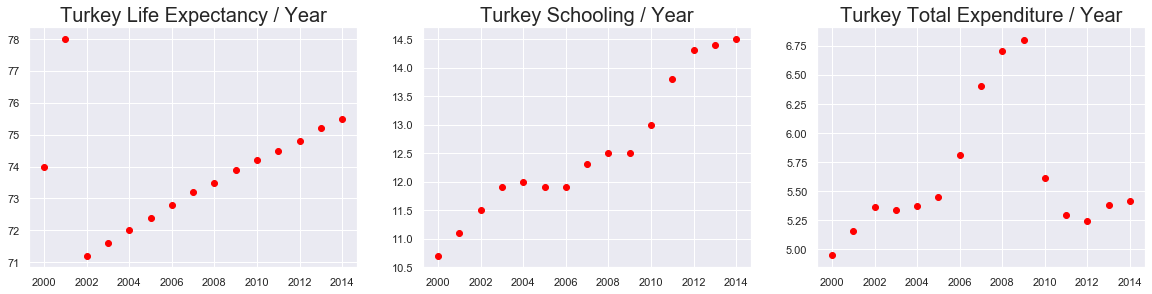

In [523]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.scatter(df2_wins[df2_wins["Country"]=='Turkey']['Year'], df2_wins[df2_wins["Country"]=='Turkey']['Life_Expectancy'], color = 'red')
plt.title("Turkey Life Expectancy / Year", fontsize=20)

plt.subplot(3,3,2)
plt.scatter(df2_wins[df2_wins["Country"]=='Turkey']['Year'], df2_wins[df2_wins["Country"]=='Turkey']['Schooling'], color = 'red')
plt.title("Turkey Schooling / Year", fontsize=20)

plt.subplot(3,3,3)
plt.scatter(df2_wins[df2_wins["Country"]=='Turkey']['Year'], df2_wins[df2_wins["Country"]=='Turkey']['Tot_Exp'], color = 'red')
plt.title("Turkey Total Expenditure / Year", fontsize=20)

Turkey life expectancy is drastically decreased in 2002. We can say that 2001 economical crises and 2002 elections could have a major effect for that. Schooling is increasing year by year which makes us happy to see it :) 
And lastly total expenditure is distinctly different than others. After 2009, it has a big change in negative way. 

### Looking at correlation heatmap

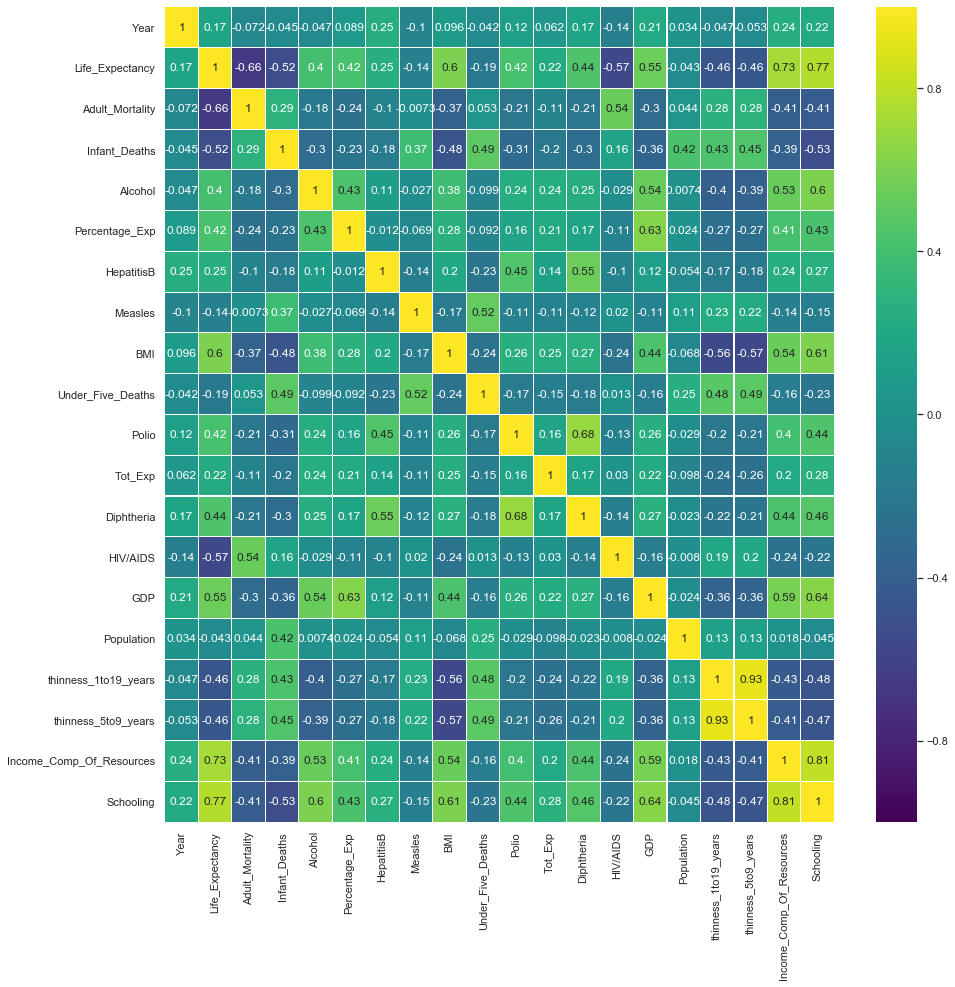

In [460]:
df_kor = df2_wins.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

### As expected, correlations between life expectancy/schooling, life expectancy/human development index and life expectancy/adult mortality have high correlations.
And also Schooling/Human developmen index, GDP/Schooling have positive correlations, too.

Let's look the jointplot for LE and Schooling:

[]

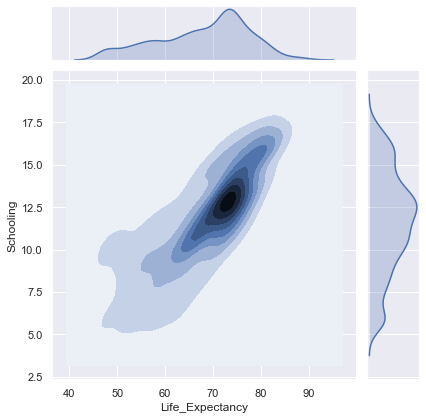

In [480]:
sns.jointplot(x=df2_wins['Life_Expectancy'],
              y=df2_wins['Schooling'],
              data=df,
              kind='kde')

plt.plot()




## These correlations are statistically significant?

#### T-Test

In [552]:
LES = scipy.stats.ttest_ind(df2_wins['Life_Expectancy'],df2_wins['Schooling'])
LEA = scipy.stats.ttest_ind(df2_wins['Life_Expectancy'],df2_wins['Adult_Mortality'])
GDS = scipy.stats.ttest_ind(df2_wins['GDP'],df2_wins['Schooling'])
LEI = scipy.stats.ttest_ind(df2_wins['Life_Expectancy'],df2_wins['Income_Comp_Of_Resources'])

a_1 = ['LEA', 'GDS', 'LES', 'LEI']
a_2 = [LEA,GDS, LES, LEI]
for i in range(0,4):
    print('For {}: {}'.format(a_1[i], a_2[i]))

For LEA: Ttest_indResult(statistic=-36.19014541111336, pvalue=4.020223500463678e-248)
For GDS: Ttest_indResult(statistic=39.91641991568952, pvalue=2.901151657437006e-293)
For LES: Ttest_indResult(statistic=251.24033356794726, pvalue=0.0)
For LEI: Ttest_indResult(statistic=314.810661835512, pvalue=0.0)


#### Ttest shows us these are all statistacally significant, p-value is lower than 0.05

In [593]:
import scipy.stats as stats
stats.ttest_ind(df2_wins.loc[df2_wins['Status']=='Developed','Life_Expectancy'],df2_wins.loc[df2_wins['Status']=='Developing','Life_Expectancy'])

Ttest_indResult(statistic=23.223572008580167, pvalue=9.63584232980934e-106)

p value is < 0.05

Hence, the difference of Average_Life_Expectancy between Developed and Developing countries is significant. We can consider 'Status' as a feature as it is related to Life Expectancy.

### PCA (Principal Component Analysis)

In [565]:
X =df2_wins.iloc[:,3:]
X.head()

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,65.0,263.0,61,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,16321581.0,17.2,17.3,0.479,10.1
1,59.9,271.0,61,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,61,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,16321581.0,17.7,17.7,0.470,9.9
3,59.5,272.0,61,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,61,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


[73.1 17.6  5.3  4.1]


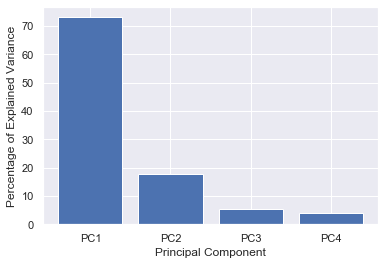

In [566]:
scaled_data = StandardScaler().fit_transform(df2_wins[['Life_Expectancy', 'Schooling', 'Adult_Mortality', 'Income_Comp_Of_Resources']])
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1) 
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
print (per_var)
plt.show()

The first principal component shares 73.1% of variance. It means we can explain variance with the first principal component

[35.3 10.6  9.   7.8  5.6  5.   4.4  3.6  2.9  2.6  2.3  2.1  2.   1.7
  1.6  1.5  0.9  0.6  0.4]


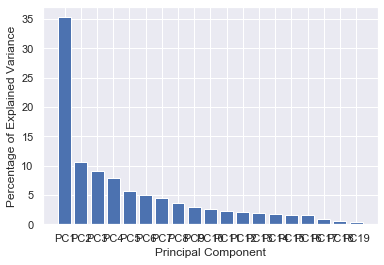

In [567]:
scaled_data = StandardScaler().fit_transform(X)
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1) 
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
print (per_var)
plt.show()

### 6. Results

 - As we showed our analyses and graphs, Life Expectancy is higher in developed countries
 - Life expectancy also have a correlation with the education.
 - It is meaningful that where the adult mortality is higher, LE is lower.
 - We could not find any relation between GDP or Total Expenditure

### 7. Conclusions

- Since we have lots of NaN value in our raw data, we may have lost critical ones having correlations with each other. The most accurate approach will be filling those population and GDP values with the exact values that can be found on the internet. Even so, we can easily say that education is a must!

